In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

breast_cancer = load_breast_cancer()

In [36]:
breast_cancer.data.shape

(569, 30)

In [37]:
from sklearn.preprocessing import MinMaxScaler

data = MinMaxScaler().fit_transform(breast_cancer.data)

In [38]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(data, breast_cancer.target,
                                                          train_size=0.80, test_size=0.20,
                                                          random_state=2022)

In [39]:
categorical_features = np.argwhere(
    np.array([len(set(breast_cancer.data[:, x])) for x in range(breast_cancer.data.shape[1])]) <= 10).flatten()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout
from keras.utils import to_categorical

# model = RandomForestClassifier(random_state=2022)
# model = AdaBoostClassifier(random_state=2022)
# model = GradientBoostingClassifier(random_state=2022)
labels_train2 = to_categorical(labels_train, 2)
labels_test2 = to_categorical(labels_test, 2)
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(train, labels_train2, batch_size=32, epochs=50, validation_data=(test, labels_test2))
# model.fit(train, labels_train)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 0s 424us/step - loss: 0.7171 - accuracy: 0.3868 - val_loss: 0.6770 - val_accuracy: 0.4211
Epoch 2/50
455/455 [==============================] - 0s 39us/step - loss: 0.6602 - accuracy: 0.5846 - val_loss: 0.6318 - val_accuracy: 0.8246
Epoch 3/50
455/455 [==============================] - 0s 37us/step - loss: 0.6181 - accuracy: 0.8044 - val_loss: 0.5921 - val_accuracy: 0.8421
Epoch 4/50
455/455 [==============================] - 0s 28us/step - loss: 0.5802 - accuracy: 0.8330 - val_loss: 0.5504 - val_accuracy: 0.8772
Epoch 5/50
455/455 [==============================] - 0s 2

In [41]:
pred_origin = model.predict_proba(test)
pred_origin[:5]

array([[0.1033166 , 0.89668345],
       [0.00898116, 0.9910189 ],
       [0.63999885, 0.36000112],
       [0.03183018, 0.96816987],
       [0.04033311, 0.9596669 ]], dtype=float32)

In [42]:
test[25]

array([0.26499124, 0.29387893, 0.24904982, 0.14655355, 0.28256748,
       0.06987301, 0.00435801, 0.0145328 , 0.32171717, 0.18091828,
       0.05808437, 0.21875   , 0.04542242, 0.02922686, 0.15875174,
       0.04323009, 0.00469697, 0.05538928, 0.25085833, 0.03870072,
       0.19815012, 0.29477612, 0.17505852, 0.09312328, 0.2154791 ,
       0.03778948, 0.00445607, 0.03014433, 0.1852947 , 0.06080283])

In [43]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [44]:
np.max(test[:,8])

1.0

In [45]:
import sys
sys.path.append('..')
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=breast_cancer.feature_names,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

[('mean concave points <= 0.10', 1.0), ('worst concave points <= 0.22', 0.70572266605248), ('symmetry error > 0.22', 0.3703338467717924), ('mean concavity <= 0.07', 0.31392790203534127), ('0.02 < area error <= 0.03', 0.31366017997554263), ('compactness error <= 0.08', 0.3009084521663121), ('0.04 < perimeter error <= 0.07', 0.2835506443152783), ('worst concavity <= 0.09', 0.2038919590029319), ('0.22 < mean perimeter <= 0.29', 0.16398373861015123), ('0.18 < worst radius <= 0.25', 0.15426065153810975), ('0.17 < mean fractal dimension <= 0.25', 0.1251324739641003), ('0.04 < radius error <= 0.07', 0.10985095572860532), ('0.18 < worst symmetry <= 0.25', 0.10566032202529407), ('0.12 < mean area <= 0.17', 0.09422718353599081), ('worst compactness <= 0.11', 0.08469556236658002), ('0.08 < worst area <= 0.12', 0.07375262683351282), ('fractal dimension error <= 0.05', 0.06690439722879322), ('0.22 < mean texture <= 0.31', 0.06223884670710156), ('0.16 < texture error <= 0.25', 0.06158276808487316), 

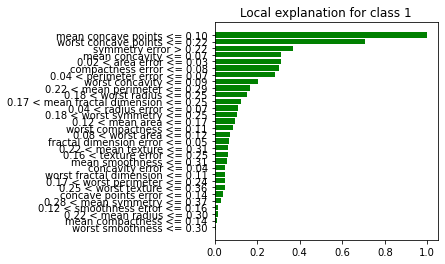

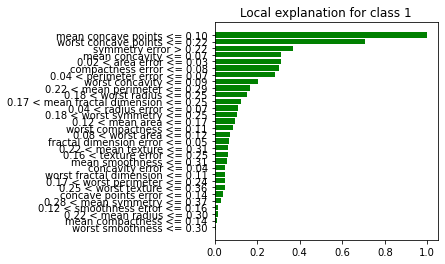

In [46]:
exp = explainer.explain_instance(test[25], model.predict_proba,
                                 num_features=30, labels=(0, 1),
                                 model_regressor='ensemble')
exp.as_pyplot_figure(label=1)

In [47]:
import tqdm as td
pred_lime = []
for i in td.tqdm(test):
    exp = explainer.explain_instance(i, model.predict_proba, num_features=30, labels=(0, 1),
                                     model_regressor='ensemble')
    # print(exp.local_pred)
    pred_lime.append(exp.local_pred[1])

100%|██████████| 114/114 [03:18<00:00,  1.74s/it]


In [48]:
pred_lime = np.array(pred_lime).round().flatten()
pred_lime[:5]

array([1, 1, 0, 1, 1])

In [49]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, np.round(pred_origin[:,1]).flatten(), digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9778    0.9565    0.9670        46
           1     0.9710    0.9853    0.9781        68

    accuracy                         0.9737       114
   macro avg     0.9744    0.9709    0.9726       114
weighted avg     0.9737    0.9737    0.9736       114



In [50]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9778    0.9565    0.9670        46
           1     0.9710    0.9853    0.9781        68

    accuracy                         0.9737       114
   macro avg     0.9744    0.9709    0.9726       114
weighted avg     0.9737    0.9737    0.9736       114



In [51]:

print('\nClassification Report:\n', classification_report(np.round(pred_origin[:,1]).flatten(), pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        45
         1.0     1.0000    1.0000    1.0000        69

    accuracy                         1.0000       114
   macro avg     1.0000    1.0000    1.0000       114
weighted avg     1.0000    1.0000    1.0000       114

